In [3]:
import numpy as np
from scipy import stats
import pandas as pd
import math
import statsmodels.formula.api as sf

# Метод наименьших квадратов

In [37]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/26278/car_regr.txt', sep = '\t')
model = sf.glm('price ~ year', data).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                   44
Model:                            GLM   Df Residuals:                       42
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          3143.2
Method:                          IRLS   Log-Likelihood:                -238.58
Date:                Sun, 08 Jan 2023   Deviance:                   1.3202e+05
Time:                        17:42:24   Pearson chi2:                 1.32e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7849
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.209e+04   6367.328     -8.181      0.0

In [38]:
model.aic

481.1518700203121

In [66]:
# RSS
rss=sum((data['price'].loc[i]-(-52090.27+26.0434*data['year'].loc[i]))**2 for i in range(data.shape[0]))
# s^2
s=round((rss/(data.shape[0]-2))**0.5,1)
d_y=data['year'].var()
# исправленная дисперсия = (n-1)/n
d_y=d_y*((data.shape[0]-1)/data.shape[0])
m_y=data['year'].mean()

2009.7954545454545

In [64]:
alp=0.05
stats.t.ppf(1-(alp/2),df=data.shape[0]-2)*s*(1/((data.shape[0]*d_y)**0.5))

6.397629609808509

In [69]:
# Найти вероятность 
oc=-52090.27+26.0434*2012
vopros= 290
x= (oc-vopros)/(s*(((1+((2012-m_y)**2/d_y))/data.shape[0])**0.5))
1-stats.t(df=data.shape[0]-2).cdf(x)

0.04491059188199553

# Множественная регрессия

In [195]:
datas = pd.read_table('https://stepik.org/media/attachments/lesson/26278/car_regr.txt')
datas['z']=datas['auto'].apply(lambda x: 1 if x=='MT' else 0)
model = sf.ols('price ~ year+mileage+z', datas).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     39.10
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           5.73e-12
Time:                        20:36:51   Log-Likelihood:                -229.55
No. Observations:                  44   AIC:                             467.1
Df Residuals:                      40   BIC:                             474.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.082e+04   7846.308     -5.203      0.0

In [205]:
a=datas[['year','mileage','z']].values
zer=np.ones(datas.shape[0])
a=np.insert(a,0,zer,axis=1)
b=np.linalg.pinv(np.dot(a.T, a))
c=np.dot(a,b)
h=np.dot(c,a.T)[1,1]
h

0.07123567304141233

In [196]:
c_rss=sum((datas['price'].loc[i]-(-40822.537394
                                  +20.488361*datas['year'].loc[i]
                                  -0.131397*datas['mileage'].loc[i]
                                  -103.582723*datas['z'].loc[i]))**2 for i in range(datas.shape[0]))
s=(c_rss/(datas.shape[0]-3-1))**0.5
stats.t.ppf(1-(alp/2),df=datas.shape[0]-3-1)*s*(b2)**0.5

0.47252788009069097

In [206]:
ei=datas['price'].loc[1]-(-40822.537394+20.488361*datas['year'].loc[1]-0.131397*datas['mileage'].loc[1]-103.582723*datas['z'].loc[1])
ei/(s*(1-h)**0.5)

1.2373847665800983

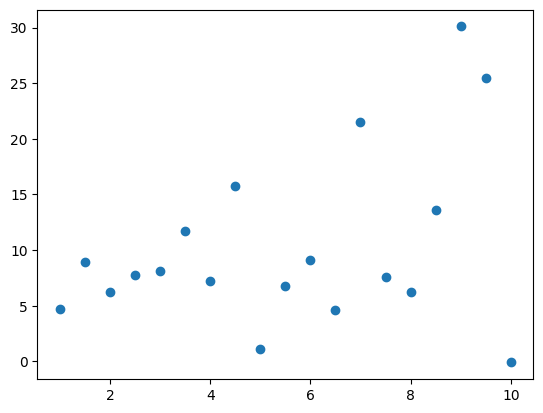

In [226]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.DataFrame()
df['y']=[float(x) for x in '4.7, 8.9, 6.2, 7.8, 8.1, 11.7, 7.2, 15.8, 1.1, 6.8, 9.1, 4.6, 21.5, 7.6, 6.2, 13.6, 30.1, 25.5, -0.1'.split(', ')]
df['x']=[float(x) for x in np.arange(1,10.1,0.5)]
plt.scatter(x=df['x'],y=df['y'])

# Zadanie

In [188]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/28461/weights.txt', sep = '\t')
data.head()
model = sf.ols('weight ~ race+educ+smoke+preg', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     12.04
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           5.87e-08
Time:                        19:52:58   Log-Likelihood:                -747.95
No. Observations:                 100   AIC:                             1506.
Df Residuals:                      95   BIC:                             1519.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2841.3777   1080.497     -2.630      0.0

In [190]:
model.aic+2

1507.9049405861435

In [175]:
# RSS
rss=sum((data['weight'].loc[i]-(-2841.38
                                -211.57*data['race'].loc[i]
                                +7.25*data['educ'].loc[i]
                                -44.25*data['smoke'].loc[i]
                                +157.75*data['preg'].loc[i]))**2 for i in range(data.shape[0]))
s2=rss/(99-4)

In [176]:
A=data[['race','educ','smoke','preg']].values
zer=np.ones(data.shape[0])
A=np.insert(A,0,zer,axis=1)
b4=np.linalg.pinv(np.dot(A.T, A))[4,4] 
stats.t.ppf(1-(alp/2),df=data.shape[0]-4-1)*(s2*b4)**0.5

55.384250039339896